In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\fessk\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\fessk\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [9]:
import pandas as pd
import numpy as np

In [11]:
proteomes = "c.elegans ciliate drosophila e.coli human methanocaldococcus mouse thermococcus tuberculosis yeast zebrafish".split()
proteins = "H2A H2B H3 H4 CREBBP".split()

log_data = dict()
data = dict()

for proteome in proteomes:
    log_data[proteome] = dict()
    for protein in proteins:
        with open(f"blastresults/{protein}-{proteome}.blast", 'r') as f:
            res = float(f.readlines()[5].split()[10])

        log_data[proteome][protein] = max(0, -np.log10(res if res != 0 else 1e-300))
        if proteome not in data.keys():
            data[proteome] = {}
        data[proteome][protein] = res

df_log = pd.DataFrame.from_records(log_data)
df = pd.DataFrame.from_records(data)

In [12]:
df

,c.elegans,ciliate,drosophila,e.coli,human,methanocaldococcus,mouse,thermococcus,tuberculosis,yeast,zebrafish
H2A,8.800000e-48,1.220000e-46,1.220000e-44,1.320000e-14,0.000000e+00,0.260000,0.000000e+00,0.000007,0.099,8.670000e-46,0.000000e+00
H2B,1.450000e-65,3.540000e-50,3.510000e-60,1.700000e+00,2.000000e-88,1.900000,3.540000e-86,1.200000,2.400,1.820000e-59,2.930000e-81
H3,4.460000e-94,8.410000e-86,9.390000e-96,9.000000e-01,2.190000e-96,0.034000,1.540000e-96,0.057000,4.600,3.310000e-87,1.770000e-95
H4,6.150000e-68,1.960000e-45,8.020000e-68,1.300000e+00,1.090000e-67,0.000082,7.600000e-68,0.000033,0.069,1.080000e-52,1.130000e-68
CREBBP,0.000000e+00,4.380000e-16,0.000000e+00,4.700000e+00,0.000000e+00,0.044000,0.000000e+00,0.031000,0.350,1.370000e-13,0.000000e+00


In [13]:
df_log

,c.elegans,ciliate,drosophila,e.coli,human,methanocaldococcus,mouse,thermococcus,tuberculosis,yeast,zebrafish
H2A,47.055517,45.913640,43.913640,13.879426,300.000000,0.585027,300.000000,5.158015,1.004365,45.061981,300.000000
H2B,64.838632,49.450997,59.454693,0.000000,87.698970,0.000000,85.450997,0.000000,0.000000,58.739929,80.533132
H3,93.350665,85.075204,95.027334,0.045757,95.659556,1.468521,95.812479,1.244125,0.000000,86.480172,94.752027
H4,67.211125,44.707744,67.095826,0.000000,66.962574,4.085128,67.119186,4.480172,1.161151,51.966576,67.946922
CREBBP,300.000000,15.358526,300.000000,0.000000,300.000000,1.356547,300.000000,1.508638,0.455932,12.863279,300.000000


In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\fessk\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\fessk\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

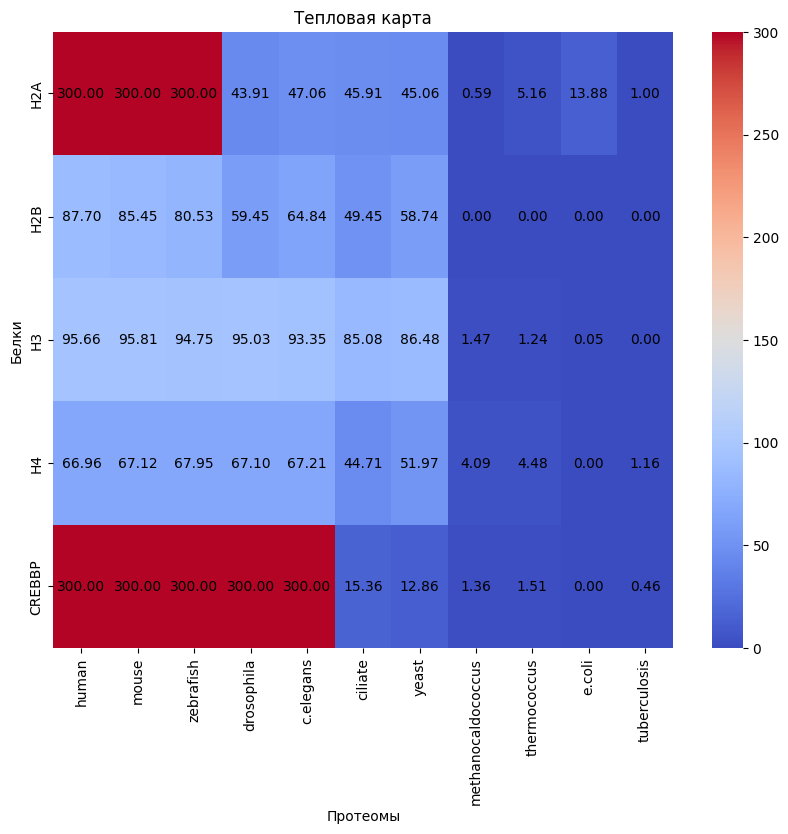

In [17]:
df_log = df_log.reindex(["human", "mouse", "zebrafish", "drosophila", "c.elegans", "ciliate", "yeast", "methanocaldococcus", "thermococcus", "e.coli", "tuberculosis"], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df_log, cmap='coolwarm')

for i in range(df_log.shape[0]):
    for j in range(df_log.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{df_log.iloc[i, j]:.2f}', ha='center', va='center')

plt.xlabel('Протеомы')
plt.ylabel('Белки')

plt.title('Тепловая карта')

plt.show()